In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

/Users/juliasbardelatti/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel("./consumo_alimentar_historico.xlsx")
df.columns = ['ano', 'faixa_etaria', 'indicador', 'resposta_sim', 'percentual', 'total_criancas']
df = df.query("faixa_etaria == 'De 2 até 4 anos' or faixa_etaria == 'De 5 até 9 anos' or faixa_etaria == 'De 10 até 19 anos'")
df = df.query("indicador != 'Hábito de realizar no mínimo as três refeições principais do dia'")
df['percentual'] = df['percentual'] * 100
df['tipo_de_habito'] = df['indicador'].map({
    #'Hábito de realizar no mínimo as três refeições principais do dia': 'Saudável',
    'Consumo de feijão': 'Saudável',
    'Consumo de fruta': 'Saudável',
    'Consumo de verduras e legumes': 'Saudável',
    'Hábito de realizar as refeições assistindo à televisão': 'Não saudável',
    'Consumo de hambúrguer e/ou embutidos': 'Não saudável',
    'Consumo de bebidas adoçadas': 'Não saudável',
    'Consumo de macarrão instantâneo, salgadinho de pacote ou biscoito salgado': 'Não saudável',
    'Consumo de biscoito recheado, doces ou guloseimas': 'Não saudável',
    'Consumo de alimentos ultraprocessados': 'Não saudável'
})


In [3]:
df_2024 = df.query("ano == 2024")
df_2024.head(100).to_clipboard(decimal=",")

In [4]:
df_resumo = df.query("ano == 2024")

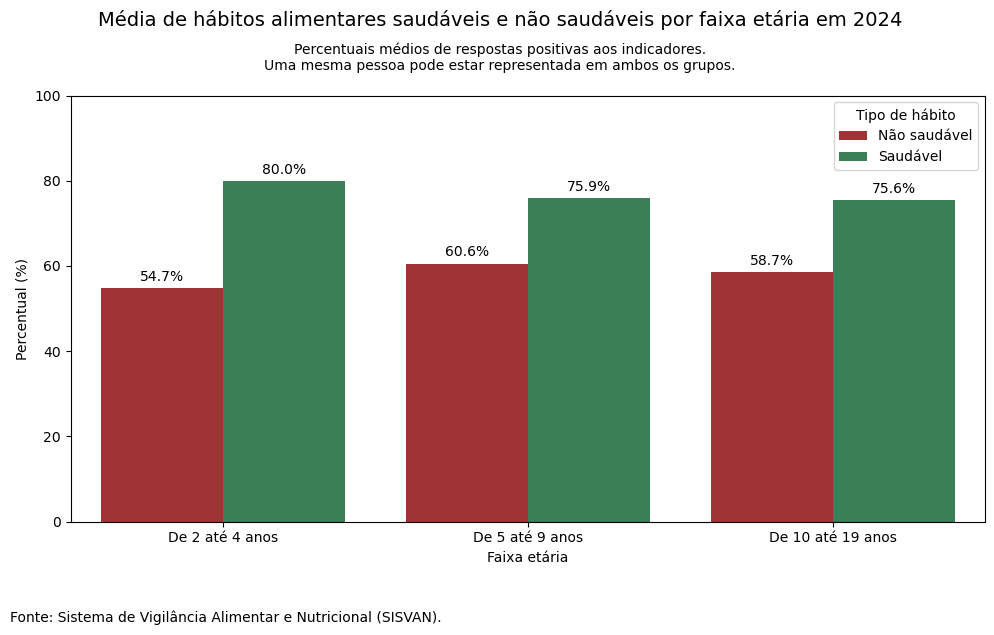

In [29]:


df_resumo = df_resumo.groupby(['faixa_etaria', 'tipo_de_habito'])['percentual'].mean().reset_index()

ordem_idades = ['De 2 até 4 anos', 'De 5 até 9 anos', 'De 10 até 19 anos']

df_resumo['faixa_etaria'] = pd.Categorical(df_resumo['faixa_etaria'], categories=ordem_idades, ordered=True)
df_resumo = df_resumo.sort_values('faixa_etaria')

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_resumo, x='faixa_etaria', y='percentual', hue='tipo_de_habito', palette=['#B22222', '#2E8B57'])

for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', padding=3)
    
# Título principal (maior e acima)
plt.suptitle("Média de hábitos alimentares saudáveis e não saudáveis por faixa etária em 2024",
             fontsize=14, y=1)

# Subtítulo (menor e abaixo do título principal)
plt.figtext(0.5, 0.90,
            "Percentuais médios de respostas positivas aos indicadores.\n"
            "Uma mesma pessoa pode estar representada em ambos os grupos.",
            ha='center', fontsize=10)

plt.ylabel('Percentual (%)')
plt.xlabel('Faixa etária')
plt.ylim(0, 100)
plt.legend(title='Tipo de hábito')
plt.figtext(0.01, -0.02, "Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=10)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

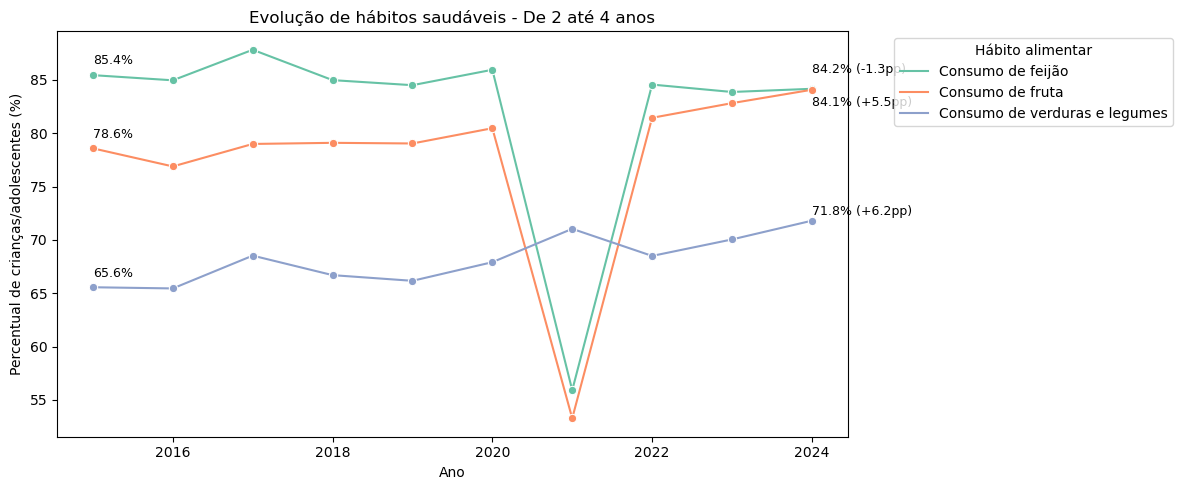

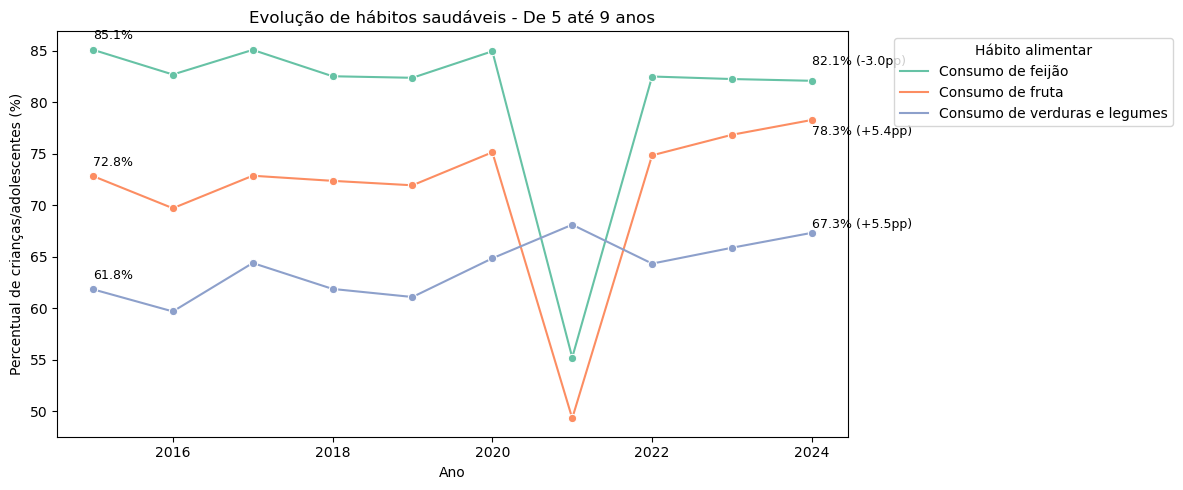

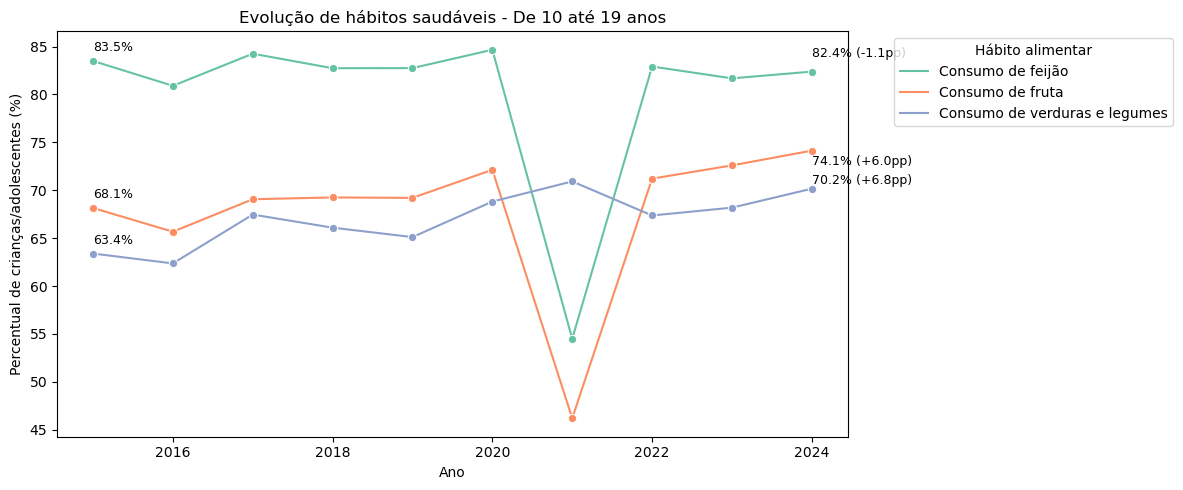

In [12]:
habitos_saudaveis = [
    'Consumo de feijão',
    'Consumo de fruta',
    'Consumo de verduras e legumes'
]

df_saudavel = df[df['indicador'].isin(habitos_saudaveis)].copy()

ordem_faixa = ['De 2 até 4 anos', 'De 5 até 9 anos', 'De 10 até 19 anos']
df_saudavel['faixa_etaria'] = pd.Categorical(df_saudavel['faixa_etaria'], categories=ordem_faixa, ordered=True)

ajustes_finais = {
    'Consumo de feijão': 1.5,
    'Consumo de fruta': -1.5,
    'Consumo de verduras e legumes': 0.5
}

for faixa in ordem_faixa:
    df_faixa = df_saudavel[df_saudavel['faixa_etaria'] == faixa]

    plt.figure(figsize=(12, 5))
    sns.lineplot(data=df_faixa, x='ano', y='percentual', hue='indicador', marker='o', palette='Set2')

    for indicador in habitos_saudaveis:
        df_indicador = df_faixa[df_faixa['indicador'] == indicador].sort_values(by='ano')
        if not df_indicador.empty:
            primeiro_ano = df_indicador.iloc[0]
            ultimo_ano = df_indicador.iloc[-1]
            delta = ultimo_ano['percentual'] - primeiro_ano['percentual']

            # Rótulo no início da série
            plt.text(primeiro_ano['ano'], primeiro_ano['percentual'] + 1, f"{primeiro_ano['percentual']:.1f}%", fontsize=9, color='black')
            
            # Rótulo no final com ajuste e delta
            ajuste = ajustes_finais.get(indicador, 0)
            plt.text(ultimo_ano['ano'], ultimo_ano['percentual'] + ajuste, 
                     f"{ultimo_ano['percentual']:.1f}% ({delta:+.1f}pp)", fontsize=9, color='black')

    plt.title(f'Evolução de hábitos saudáveis - {faixa}')
    plt.ylabel('Percentual de crianças/adolescentes (%)')
    plt.xlabel('Ano')
    plt.legend(title='Hábito alimentar', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()


In [7]:
df.query("faixa_etaria == 'De 2 até 4 anos' and (ano == 2024 or ano == 2015)").sort_values("indicador")

,ano,faixa_etaria,indicador,resposta_sim,percentual,total_criancas,tipo_de_habito
20,2024,De 2 até 4 anos,Consumo de alimentos ultraprocessados,391608,78.944631,496054,Não saudável
389,2015,De 2 até 4 anos,Consumo de alimentos ultraprocessados,46151,85.784000,53799,Não saudável
17,2024,De 2 até 4 anos,Consumo de bebidas adoçadas,298205,60.115916,496050,Não saudável
386,2015,De 2 até 4 anos,Consumo de bebidas adoçadas,35997,66.910000,53799,Não saudável
19,2024,De 2 até 4 anos,"Consumo de biscoito recheado, doces ou guloseimas",276714,55.783490,496050,Não saudável
388,2015,De 2 até 4 anos,"Consumo de biscoito recheado, doces ou guloseimas",31507,58.564000,53799,Não saudável
382,2015,De 2 até 4 anos,Consumo de feijão,45967,85.442000,53799,Saudável
13,2024,De 2 até 4 anos,Consumo de feijão,417493,84.163492,496050,Saudável
14,2024,De 2 até 4 anos,Consumo de fruta,417051,84.074388,496050,Saudável
383,2015,De 2 até 4 anos,Consumo de fruta,42276,78.581000,53799,Saudável


In [30]:

habitos_saudaveis = [
    'Consumo de feijão',
    'Consumo de fruta',
    'Consumo de verduras e legumes'
]

ordem_faixa = ['De 2 até 4 anos', 'De 5 até 9 anos', 'De 10 até 19 anos']
df_saudavel = df[df['indicador'].isin(habitos_saudaveis)]
df_saudavel['faixa_etaria'] = pd.Categorical(df_saudavel['faixa_etaria'], categories=ordem_faixa, ordered=True)

tabela_variacao = []

for faixa in ordem_faixa:
    for habito in habitos_saudaveis:
        df_filtro = df_saudavel[(df_saudavel['faixa_etaria'] == faixa) & (df_saudavel['indicador'] == habito)].sort_values('ano')
        if not df_filtro.empty:
            ano_inicio = df_filtro.iloc[0]['ano']
            ano_fim = df_filtro.iloc[-1]['ano']
            valor_inicio = df_filtro.iloc[0]['percentual']
            valor_fim = df_filtro.iloc[-1]['percentual']
            total_inicio = df_filtro.iloc[0]['total_criancas']
            total_fim = df_filtro.iloc[-1]['total_criancas']
            total_resposta_sim_inicio = df_filtro.iloc[0]['resposta_sim']
            total__resposta_sim_fim = df_filtro.iloc[-1]['resposta_sim']
            variacao_abs = valor_fim - valor_inicio

            tabela_variacao.append({
                'Faixa etária': faixa,
                'Hábito': habito,
                f'{int(ano_inicio)} (%)': round(valor_inicio, 1),
                f'{int(ano_fim)} (%)': round(valor_fim, 1),
                'Variação (p.p.)': round(variacao_abs, 1),
                f'total resposta sim {int(ano_inicio)} (n)': total_resposta_sim_inicio,
                f'total criancas avaliadas {int(ano_inicio)} (n)': total_inicio,
                f'total resposta sim {int(ano_fim)} (n)': total__resposta_sim_fim,
                f'total criancas avaliadas {int(ano_fim)} (n)': total_fim
            })

df_variacao = pd.DataFrame(tabela_variacao)
df_variacao.to_clipboard(decimal=",")

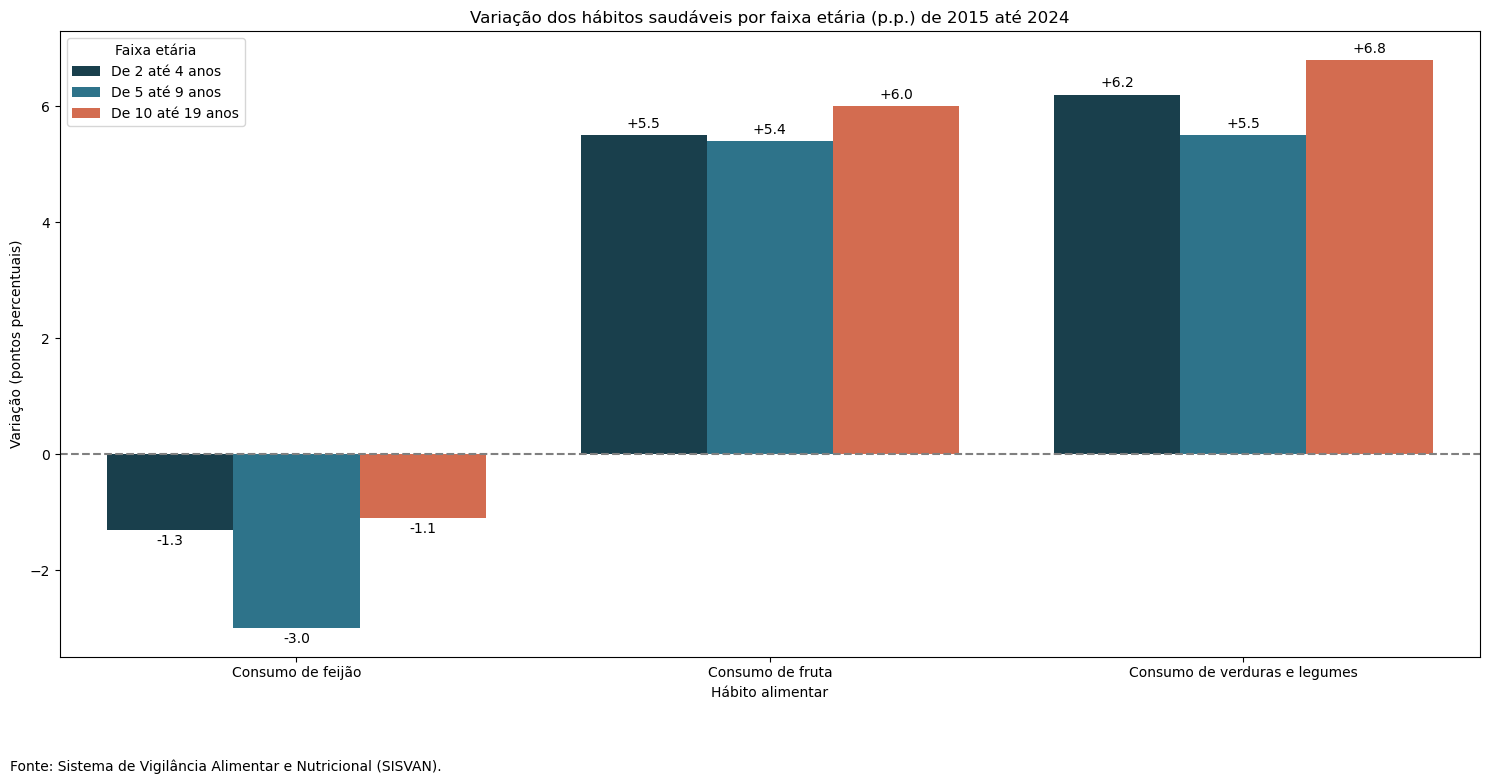

In [31]:
df_variacao['Variação (p.p.)'] = pd.to_numeric(df_variacao['Variação (p.p.)'])

cores_personalizadas = {
    'De 2 até 4 anos': '#114354',
    'De 5 até 9 anos': '#1F7A99',
    'De 10 até 19 anos': '#E95F3A'
}

plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=df_variacao,
    x='Hábito',
    y='Variação (p.p.)',
    hue='Faixa etária',
    palette=cores_personalizadas
)

for container in ax.containers:
    labels = [f'{v.get_height():+.1f}' for v in container]
    ax.bar_label(container, labels=labels, padding=3)


plt.axhline(0, color='gray', linestyle='--')
plt.title('Variação dos hábitos saudáveis por faixa etária (p.p.) de 2015 até 2024')
plt.ylabel('Variação (pontos percentuais)')
plt.xlabel('Hábito alimentar')
plt.xticks()
plt.legend(title='Faixa etária', loc='upper left')
plt.figtext(0.01, -0.02, "Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=10)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()

In [32]:

habitos_saudaveis = [
    'Hábito de realizar as refeições assistindo à televisão',
    'Consumo de hambúrguer e/ou embutidos',
    'Consumo de bebidas adoçadas',
    'Consumo de macarrão instantâneo, salgadinho de pacote ou biscoito salgado',
    'Consumo de biscoito recheado, doces ou guloseimas',
    'Consumo de alimentos ultraprocessados'
]

ordem_faixa = ['De 2 até 4 anos', 'De 5 até 9 anos', 'De 10 até 19 anos']
df_saudavel = df[df['indicador'].isin(habitos_saudaveis)]
df_saudavel['faixa_etaria'] = pd.Categorical(df_saudavel['faixa_etaria'], categories=ordem_faixa, ordered=True)

tabela_variacao = []


for faixa in ordem_faixa:
    for habito in habitos_saudaveis:
        df_filtro = df_saudavel[(df_saudavel['faixa_etaria'] == faixa) & (df_saudavel['indicador'] == habito)].sort_values('ano')
        if not df_filtro.empty:
            ano_inicio = df_filtro.iloc[0]['ano']
            ano_fim = df_filtro.iloc[-1]['ano']
            valor_inicio = df_filtro.iloc[0]['percentual']
            valor_fim = df_filtro.iloc[-1]['percentual']
            total_inicio = df_filtro.iloc[0]['total_criancas']
            total_fim = df_filtro.iloc[-1]['total_criancas']
            total_resposta_sim_inicio = df_filtro.iloc[0]['resposta_sim']
            total__resposta_sim_fim = df_filtro.iloc[-1]['resposta_sim']
            variacao_abs = valor_fim - valor_inicio

            tabela_variacao.append({
                'Faixa etária': faixa,
                'Hábito': habito,
                f'{int(ano_inicio)} (%)': round(valor_inicio, 1),
                f'{int(ano_fim)} (%)': round(valor_fim, 1),
                'Variação (p.p.)': round(variacao_abs, 1),
                f'total resposta sim {int(ano_inicio)} (n)': total_resposta_sim_inicio,
                f'total criancas avaliadas {int(ano_inicio)} (n)': total_inicio,
                f'total resposta sim {int(ano_fim)} (n)': total__resposta_sim_fim,
                f'total criancas avaliadas {int(ano_fim)} (n)': total_fim
            })

df_variacao = pd.DataFrame(tabela_variacao)
df_variacao.to_clipboard(decimal=",")

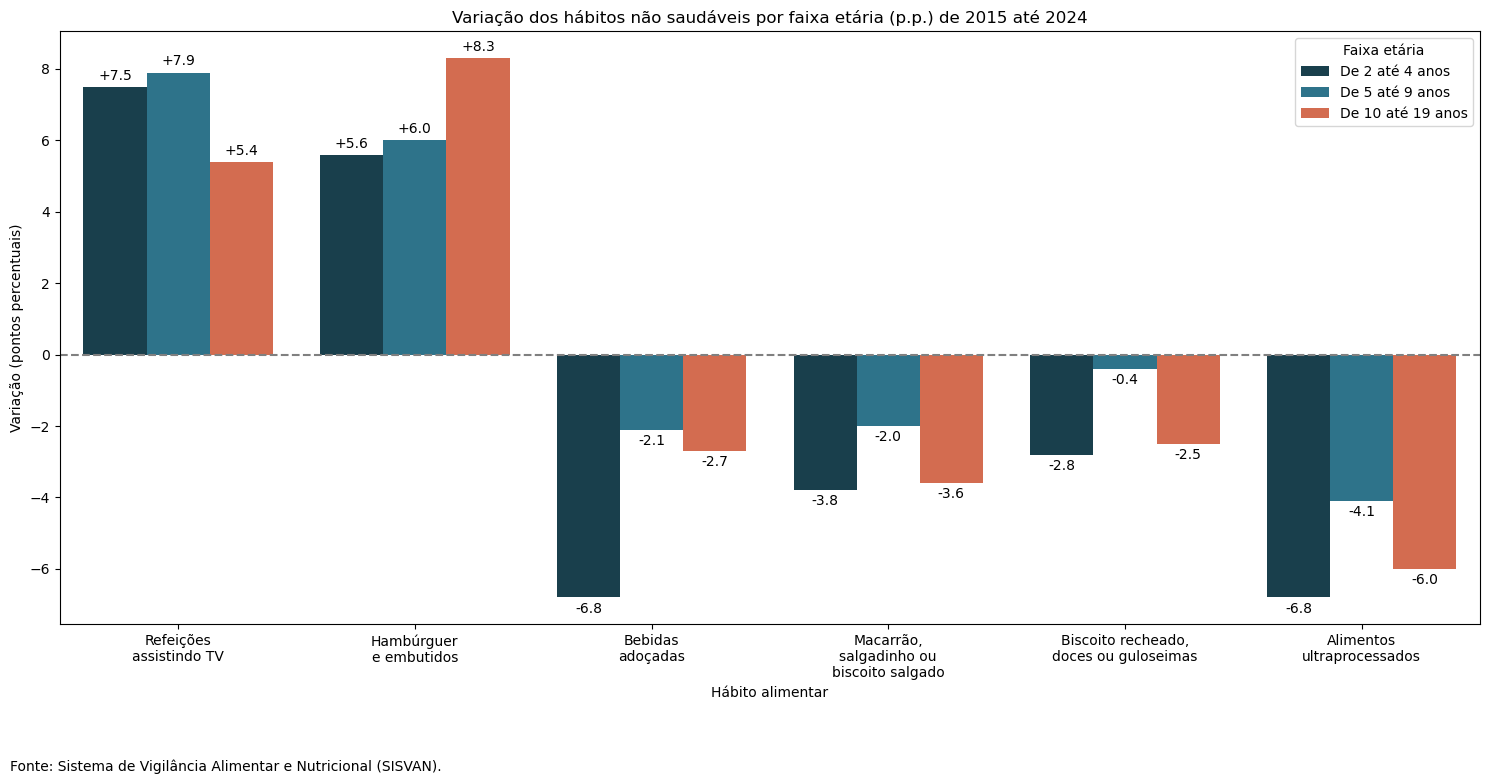

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

df_variacao['indicador_novo'] = df_variacao['Hábito'].replace({
    'Hábito de realizar as refeições assistindo à televisão': 'Refeições\nassistindo TV',
    'Consumo de hambúrguer e/ou embutidos': 'Hambúrguer\ne embutidos',
    'Consumo de bebidas adoçadas': 'Bebidas\nadoçadas',
    'Consumo de macarrão instantâneo, salgadinho de pacote ou biscoito salgado': 'Macarrão,\nsalgadinho ou\nbiscoito salgado',
    'Consumo de biscoito recheado, doces ou guloseimas': 'Biscoito recheado,\ndoces ou guloseimas',
    'Consumo de alimentos ultraprocessados': 'Alimentos\nultraprocessados'
})

df_variacao['Variação (p.p.)'] = pd.to_numeric(df_variacao['Variação (p.p.)'])

cores_personalizadas = {
    'De 2 até 4 anos': '#114354',
    'De 5 até 9 anos': '#1F7A99',
    'De 10 até 19 anos': '#E95F3A'
}

plt.figure(figsize=(15, 8))
ax = sns.barplot(
    data=df_variacao,
    x='indicador_novo',
    y='Variação (p.p.)',
    hue='Faixa etária',
    palette=cores_personalizadas
)

for container in ax.containers:
    labels = [f'{v.get_height():+.1f}' for v in container]
    ax.bar_label(container, labels=labels, padding=3)


plt.axhline(0, color='gray', linestyle='--')
plt.title('Variação dos hábitos não saudáveis por faixa etária (p.p.) de 2015 até 2024')
plt.ylabel('Variação (pontos percentuais)')
plt.xlabel('Hábito alimentar')
plt.xticks()
plt.legend(title='Faixa etária', loc='upper right')
plt.figtext(0.01, -0.02, "Fonte: Sistema de Vigilância Alimentar e Nutricional (SISVAN).", ha="left", fontsize=10)
plt.tight_layout(rect=[0, 0.05, 1, 0.95])
plt.show()